In [2]:
import tensorflow as t
import numpy as n
import matplotlib.pyplot as p
import imageio

In [3]:
(trainX, trainY), (testX, testY) = t.keras.datasets.mnist.load_data()
trainX = trainX / 255
testX = testX / 255

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(trainX.shape, 'train shape')
print(testX.shape, 'test shape')

(60000, 28, 28) train shape
(10000, 28, 28) test shape


In [5]:
trainY = t.keras.utils.to_categorical(trainY, 10)
testY = t.keras.utils.to_categorical(testY, 10)

In [6]:
model = t.keras.models.Sequential([
    t.keras.layers.Conv2D(
        input_shape=(28,28,1),
        filters=32,
        kernel_size=(5,5),
        padding='same',
        activation='relu'
    ), 
    t.keras.layers.MaxPool2D(pool_size=(2,2)),
    t.keras.layers.Conv2D(
        filters=64,
        kernel_size=(5,5),
        padding='same',
        activation='relu'
    ), 
    t.keras.layers.MaxPool2D(pool_size=(2,2)),
    t.keras.layers.Flatten(),
    t.keras.layers.Dense(1000, activation=t.nn.relu),
    t.keras.layers.Dense(10, activation=t.nn.softmax)                                    
])

In [7]:
model.compile(loss=t.keras.losses.categorical_crossentropy, optimizer=t.keras.optimizers.Adam(), metrics=['accuracy'])

In [20]:
history = model.fit(trainX.reshape(-1, 28, 28, 1), trainY,batch_size=32, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0054 - accuracy: 0.9989
Epoch 2/8
1875/1875 [==============================] - 192s 102ms/step - loss: 0.0058 - accuracy: 0.9988
Epoch 3/8
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0066 - accuracy: 0.9989
Epoch 4/8
1875/1875 [==============================] - 192s 102ms/step - loss: 0.0050 - accuracy: 0.9991
Epoch 5/8
1875/1875 [==============================] - 192s 103ms/step - loss: 0.0058 - accuracy: 0.9989
Epoch 6/8
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0051 - accuracy: 0.9990
Epoch 7/8
1875/1875 [==============================] - 194s 103ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 8/8
1875/1875 [==============================] - 196s 105ms/step - loss: 0.0061 - accuracy: 0.9989


In [29]:
print(model.evaluate(testX.reshape(-1, 28, 28, 1), testY))

313/313 [==============================] - 9s 29ms/step - loss: 0.0890 - accuracy: 0.9915
[0.08903231471776962, 0.9915000200271606]


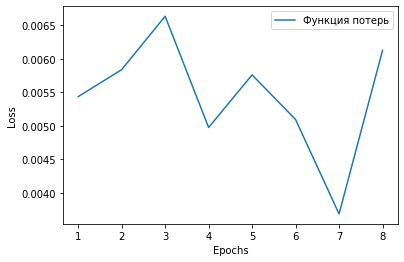

In [30]:
loss_values = history.history['loss']
epochs = range(1, len(loss_values)+1)
p.plot(epochs, loss_values, label='Функция потерь')
p.xlabel('Epochs')
p.ylabel('Loss')
p.legend()
p.show()

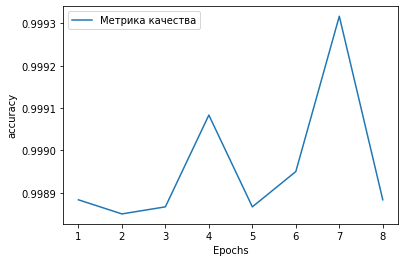

In [31]:
accu_values = history.history['accuracy']
epochs = range(1, len(accu_values)+1)
p.plot(epochs, accu_values, label='Метрика качества')
p.xlabel('Epochs')
p.ylabel('accuracy')
p.legend()
p.show()

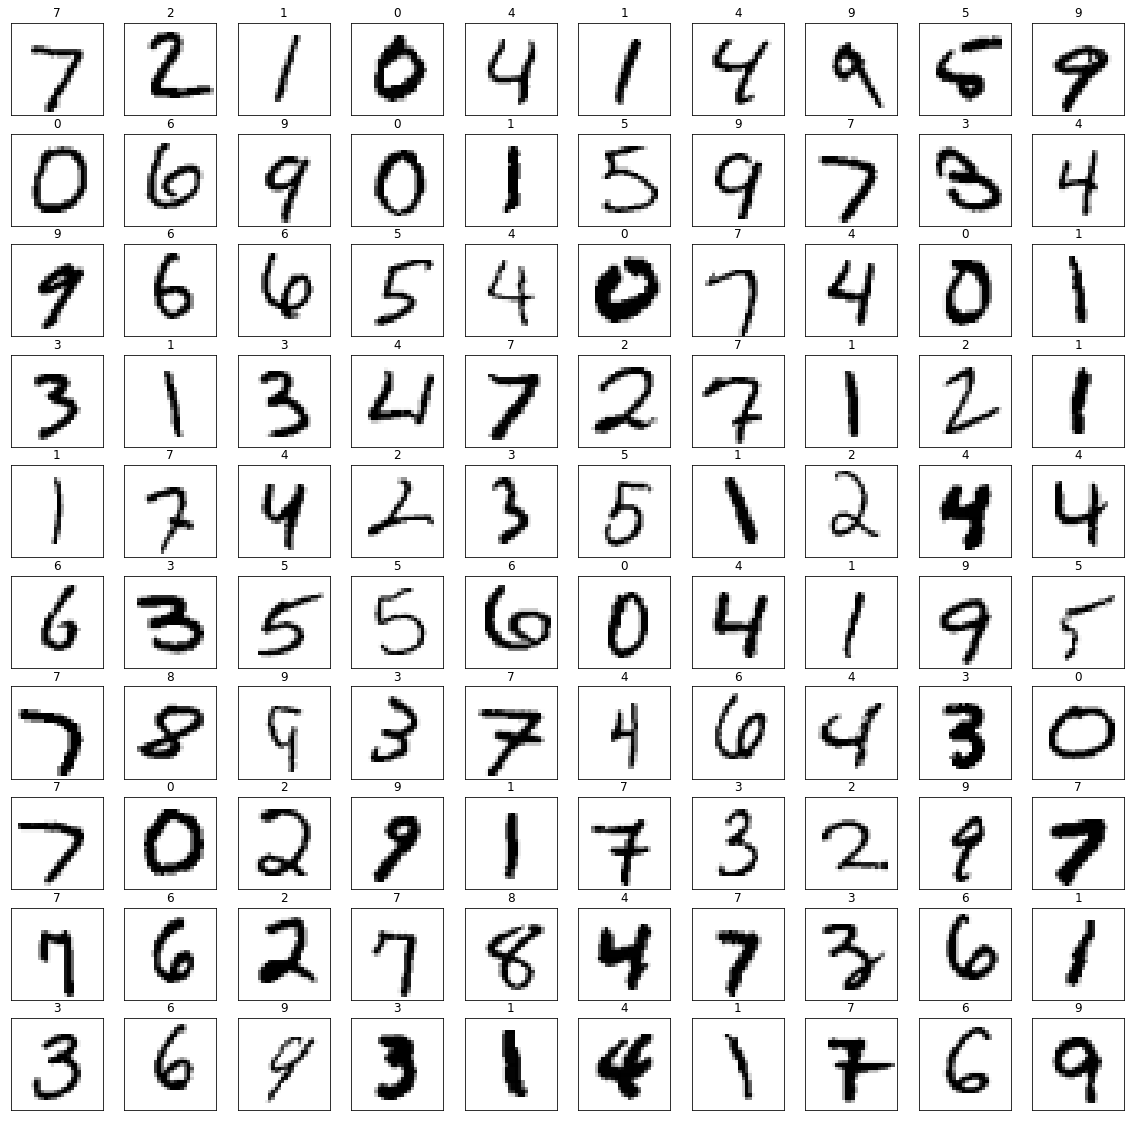

In [28]:
p.figure(figsize=(20,20))
for i in range(100):
  p.subplot(10,10, i+1)
  p.xticks([])
  p.yticks([])
  pic = n.expand_dims(testX[i], axis = 0)
  ot = model.predict(pic.reshape(-1, 28, 28, 1))
  p.imshow(testX[i], cmap=p.cm.binary)
  p.title(n.argmax(ot))
